In [0]:
import pandas as pd
import os
import io
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from google.colab import files
import csv

In [3]:
from google.colab import files
uploaded = files.upload()

Saving 5challenge_testing_littlebass09.csv to 5challenge_testing_littlebass09.csv
Saving 5challenge_training_littlebass09.csv to 5challenge_training_littlebass09.csv


In [0]:
#Code to make mesh grid, found at:
#https://scikit-learn.org/stable/auto_examples/svm/plot_iris.html
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [5]:
#Load in CSV
training_df = pd.read_csv(io.StringIO(uploaded['5challenge_training_littlebass09.csv'].decode('utf-8')))
training_df.head()

,Unnamed: 0,Class,Feature 0,Feature 1
0,0,0,0.834127,-2.026165
1,1,0,-0.402496,-0.400772
2,2,0,0.664415,0.643362
3,3,0,-0.340182,0.855251
4,4,1,-3.774897,0.001649


In [0]:
X = training_df[['Feature 0', 'Feature 1']].values
Y = training_df[['Class']].values


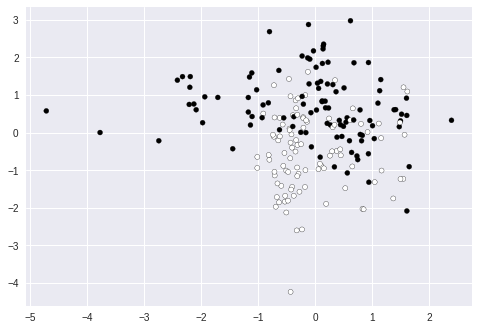

In [8]:
#Plot data
plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y.ravel(),
            s=25, edgecolor='k')
plt.show()

In [0]:
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

In [0]:
#Function to apply SVM and plot data
def UseCsv(clf, x, y):
  clf.fit(x, y)
  
  mispredictions = 0
  for i in range(len(x)):
    if clf.predict([x[i]]) != y[i]:
      mispredictions += 1
  
  print("Mispredictions: " + str(mispredictions))  
  
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
  plt.scatter(x[:, 0], x[:, 1], marker='o', c=y.ravel(), s=25, edgecolor='k')
  plt.show()
  

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mispredictions: 40


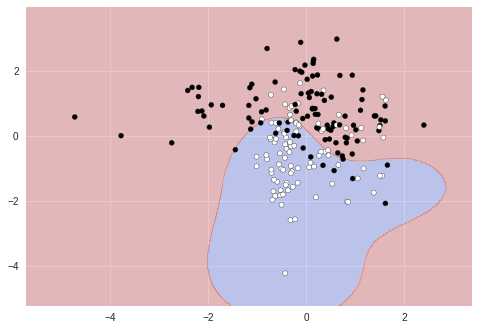

In [11]:
#Use rbf kernel 
clf = SVC(kernel='rbf')
UseCsv(clf, X, Y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mispredictions: 52


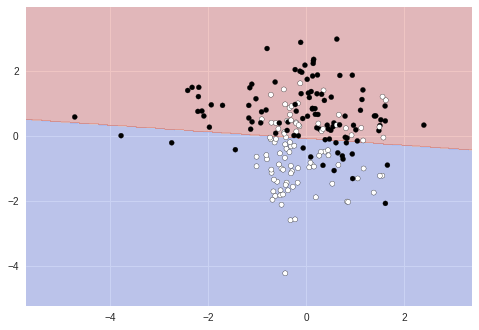

In [12]:
#use linear kernel
linearClf = SVC(kernel='linear')
UseCsv(linearClf, X, Y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mispredictions: 51


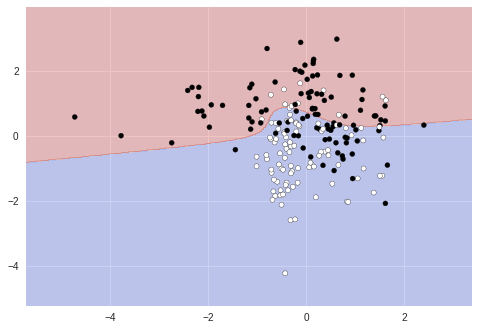

In [13]:
#Use polynomial kernel
polyClf = SVC(kernel='poly')
UseCsv(polyClf, X, Y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mispredictions: 75


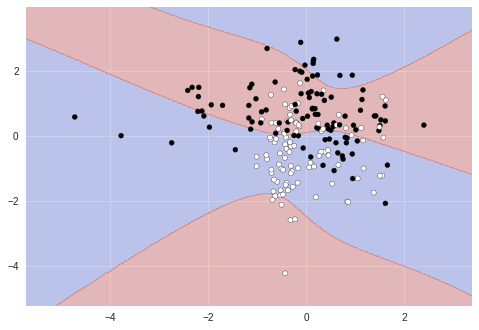

In [14]:
#Use sigmoid kernel
sigmoidClf = SVC(kernel='sigmoid')
UseCsv(sigmoidClf, X, Y)

### Here is where I use my own kernel

In [0]:
#Define the landmarks to draw guassian circles around
landmarks = [[-2.2, 1], [-0.5, -1.2], [0.2, 1.7], [1, -0.3]]

#Calculate new features for a single landmark and point
def CalculatePoint(point, landmark):
  distance = 0
  for i in range(len(landmark)):
    distance += (point[i] - landmark[i])**2
  return np.exp(- distance / 2)

#Calculate all new features for a point
def TransformPoint(point):
  value = [CalculatePoint(point, landmark) for landmark in landmarks]
  return value

#Calculate all new features for all points
def TransformData(X):
  return [TransformPoint(x) for x in X]
  

In [0]:
#Apply SVM with new kernel and transforming points to landmark features
def UseCsv2(clf, x, y):
  newX = TransformData(x)
  clf.fit(newX, y)
  
  mispredictions = 0
  for i in range(len(x)):
    if clf.predict([TransformPoint(x[i])]) != y[i]:
      mispredictions += 1
  
  print("Mispredictions: " + str(mispredictions))  
  
  Z = clf.predict(TransformData(np.c_[xx.ravel(), yy.ravel()]))
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
  plt.scatter(x[:, 0], x[:, 1], marker='o', c=y.ravel(), s=25, edgecolor='k')
  landmarkDataFrame = pd.DataFrame(landmarks)
  plt.scatter(landmarkDataFrame.iloc[:, 0], landmarkDataFrame.iloc[:, 1], marker='x', c='g', s=50, edgecolor='k')
  plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mispredictions: 47


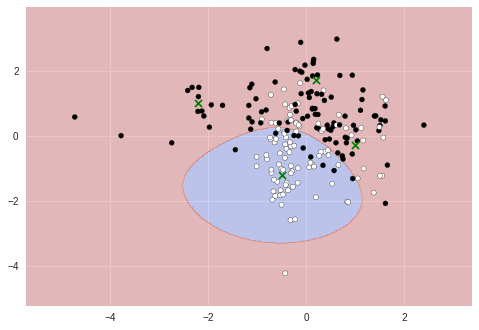

In [17]:
#The plot is presented as previously, but the landmarks are shown as green x's
newClf = SVC(kernel='linear')
UseCsv2(newClf, X, Y)

### Calculate Test Values

In [18]:
#Load in CSV
testing_df = pd.read_csv(io.StringIO(uploaded['5challenge_testing_littlebass09.csv'].decode('utf-8')))
testing_df.head()

XTest = testing_df[['Feature 0', 'Feature 1']].values

clf = SVC(kernel='rbf')
clf.fit(X, Y)

predictions = [clf.predict([xTest]) for xTest in XTest]
print(predictions)


with open("predictions.csv", "w", newline='') as f:
    writer = csv.writer(f)
    writer.writerows(predictions)
files.download("predictions.csv")






/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[array([0]), array([0]), array([0]), array([1]), array([0]), array([1]), array([1]), array([1]), array([0]), array([0]), array([1]), array([1]), array([1]), array([0]), array([1]), array([1]), array([0]), array([0]), array([1]), array([1]), array([0]), array([0]), array([0]), array([1]), array([1]), array([1]), array([0]), array([1]), array([0]), array([1]), array([0]), array([1]), array([0]), array([0]), array([0]), array([0]), array([0]), array([1]), array([0]), array([1]), array([1]), array([0]), array([1]), array([0]), array([0]), array([1]), array([0]), array([1]), array([0]), array([0]), array([1]), array([0]), array([1]), array([1]), array([0]), array([1]), array([1]), array([1]), array([0]), array([1]), array([1]), array([1]), array([0]), array([1]), array([0]), array([0]), array([1]), array([0]), array([1]), array([0]), array([1]), array([1]), array([0]), array([0]), array([1]), array([0]), array([0]), array([1]), array([0]), array([1]), array([0]), array([1]), array([1]), arr

In [19]:
predictionsFlattened = [item for sublist in predictions for item in sublist]
print(predictionsFlattened)

[0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1]


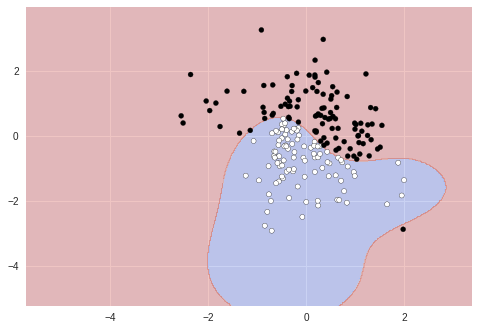

In [20]:
predictionZ = clf.predict(np.c_[xx.ravel(), yy.ravel()])
predictionZ = predictionZ.reshape(xx.shape)
plt.contourf(xx, yy, predictionZ, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(XTest[:, 0], XTest[:, 1], marker='o', c=predictionsFlattened, s=25, edgecolor='k')
plt.show()